In [61]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [62]:
#Import Combined Cleaned Kaggle Data
df = pd.read_csv('Cleaned_Combined_Kaggle_Data.csv')
df.head()

,Age,Gender,Country,Formal_Education,Position,Years_Coding,Salary
0,23.0,Male,France,Master’s degree,Software Engineer,2.0,34999.5
1,42.0,Male,India,Professional degree,Software Engineer,0.0,6249.5
2,42.0,Male,Australia,Master’s degree,Other,2.0,274999.5
3,52.0,Male,France,Master’s degree,Data Scientist,20.0,64999.5
4,23.0,Male,India,Master’s degree,Data Scientist,5.0,12499.5


In [63]:
# Using on US data 
US_df = df[df['Country'] == 'United States of America']
US_df

,Age,Gender,Country,Formal_Education,Position,Years_Coding,Salary
5,23.0,Female,United States of America,Bachelor’s degree,Data Scientist,5.0,84999.5
8,32.0,Male,United States of America,Master’s degree,Product/Project Manager,5.0,94999.5
9,52.0,Female,United States of America,Master’s degree,Data Analyst,20.0,137499.5
12,37.0,Male,United States of America,Bachelor’s degree,Other,10.0,137499.5
19,32.0,Female,United States of America,Master’s degree,Research Scientist,10.0,174999.5
...,...,...,...,...,...,...,...
26115,32.0,Male,United States of America,Some college/university study without earning ...,Other,5.0,137499.5
26127,37.0,Female,United States of America,Master’s degree,Data Analyst,2.0,84999.5
26131,57.0,Male,United States of America,Doctoral degree,Data Scientist,5.0,400000.0
26135,52.0,Female,United States of America,Master’s degree,Software Engineer,20.0,174999.5


In [64]:
US_df['Formal_Education'].unique()

array(['Bachelor’s degree', 'Master’s degree', 'Doctoral degree',
       'I prefer not to answer', 'Professional degree',
       'Some college/university study without earning a bachelor’s degree',
       'No formal education past high school'], dtype=object)

In [65]:
comma = []
for x in US_df['Formal_Education']:
    comma.append(x.replace('’',''))
US_df['Formal_Education'] = comma

idk = []
for x in US_df['Formal_Education']:
    idk.append(x.replace('I prefer not to answer','0'))
US_df['Formal_Education'] = idk

no_education = []
for x in US_df['Formal_Education']:
    no_education.append(x.replace('No formal education past high school','1'))
US_df['Formal_Education'] = no_education

some = []
for x in US_df['Formal_Education']:
    some.append(x.replace('Some college/university study without earning a bachelors degree','2'))
US_df['Formal_Education'] = some

PD = []
for x in US_df['Formal_Education']:
    PD.append(x.replace('Professional degree','3'))
US_df['Formal_Education'] = PD

BD = []
for x in US_df['Formal_Education']:
    BD.append(x.replace('Bachelors degree','4'))
US_df['Formal_Education'] = BD

MD = []
for x in US_df['Formal_Education']:
    MD.append(x.replace('Masters degree','5'))
US_df['Formal_Education'] = MD

DD = []
for x in US_df['Formal_Education']:
    DD.append(x.replace('Doctoral degree','6'))
US_df['Formal_Education'] = DD

In [66]:
US_df['Formal_Education']

5        4
8        5
9        5
12       4
19       5
        ..
26115    2
26127    5
26131    6
26135    5
26155    4
Name: Formal_Education, Length: 4887, dtype: object

In [67]:
US_df['Formal_Education'] = pd.to_numeric(US_df['Formal_Education'], errors = 'coerce')

In [68]:
US_df['Formal_Education'].dtypes

dtype('int64')

In [69]:
# Women data of US
Women_df = US_df[US_df['Gender'] == 'Female']

In [70]:
# Men data of US
Men_df = US_df[US_df['Gender'] == 'Male']

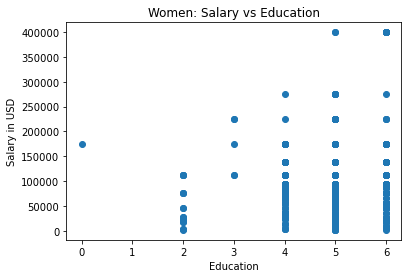

In [71]:
plt.scatter(Women_df.Formal_Education, Women_df.Salary)
plt.xlabel('Education')
plt.ylabel('Salary in USD')
plt.title('Women: Salary vs Education')
plt.show()

0 = I prefer not to answer, 1 = No formal education past high school, 2 = Some college/university study without earning a bachelor’s degree, 3 = Professional degree, 4 = Bachelor’s degree, 5 = Master’s degree, 6 = Doctoral degree

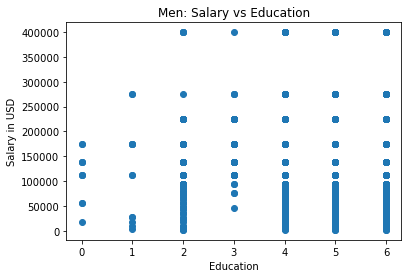

In [72]:
plt.scatter(Men_df.Formal_Education, Men_df.Salary)
plt.xlabel('Education')
plt.ylabel('Salary in USD')
plt.title('Men: Salary vs Education')
plt.show()

In [73]:
Women_X = Women_df['Formal_Education']
Men_X = Men_df['Formal_Education']

In [74]:
Women_X = Women_df.Formal_Education.values.reshape(-1, 1)
Men_X = Men_df.Formal_Education.values.reshape(-1, 1)

In [75]:
Women_y = Women_df.Salary
Men_y = Men_df.Salary

In [76]:
from sklearn.linear_model import LinearRegression
Women_model = LinearRegression()
Men_model = LinearRegression()

In [77]:
Women_model.fit(Women_X, Women_y)

LinearRegression()

In [78]:
Men_model.fit(Men_X, Men_y)

LinearRegression()

In [79]:
Women_y_pred = Women_model.predict(Women_X)
print(Women_y_pred.shape)

(885,)


In [80]:
Men_y_pred = Men_model.predict(Men_X)
print(Men_y_pred.shape)

(3903,)


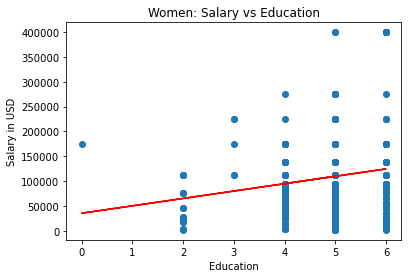

In [81]:
plt.scatter(Women_X, Women_y)
plt.plot(Women_X, Women_y_pred, color='red')
plt.xlabel('Education')
plt.ylabel('Salary in USD')
plt.title('Women: Salary vs Education')
plt.show()

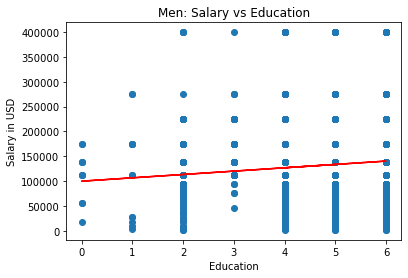

In [82]:
plt.scatter(Men_X, Men_y)
plt.plot(Men_X, Men_y_pred, color='red')
plt.xlabel('Education')
plt.ylabel('Salary in USD')
plt.title('Men: Salary vs Education')
plt.show()

In [83]:
print(Women_model.coef_)
print(Women_model.intercept_)

[14895.62758145]
35160.81416349055


In [84]:
print(Men_model.coef_)
print(Men_model.intercept_)

[6749.67429451]
99772.47478803113


In [85]:
# compute with statsmodels, by adding intercept manually
import statsmodels.api as sm
Women_X1 = sm.add_constant(Women_X)
result = sm.OLS(Women_y, Women_X1).fit()
#print dir(result)
print(result.rsquared, result.rsquared_adj)

0.03930021772367798 0.038212222500262016


In [86]:
# compute with statsmodels, by adding intercept manually
import statsmodels.api as sm
Men_X1 = sm.add_constant(Men_X)
result = sm.OLS(Men_y, Men_X1).fit()
#print dir(result)
print(result.rsquared, result.rsquared_adj)

0.008440846472858587 0.008186665710611218
